## Operações lineares e não lineares

In [2]:
# Importando os módulos necessários
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Setando caminho das imagens
folder_imgs = '/data/Documents/UFAL/repos/pdi/img/'
img = cv.imread(folder_imgs + 'Lenna.png', cv.IMREAD_COLOR)

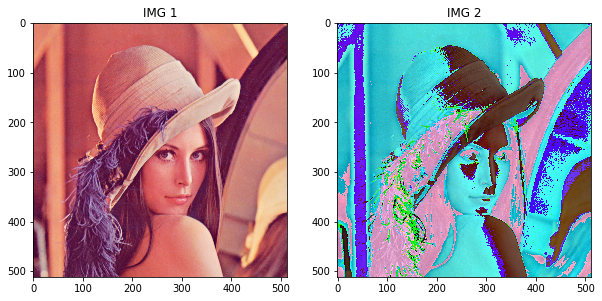

In [4]:
# Add a scalar to an image
val = 123
img2 = img + val  # A soma ocorre usando módulo, logo se houver estouro do limite de 255, começa-se do 0 novamente.
with plt.rc_context(rc={'figure.figsize' : [10, 10]}): # Jupyter confs
    plt.subplot(121), plt.title("IMG 1"), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.subplot(122), plt.title("IMG 2"), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.show()

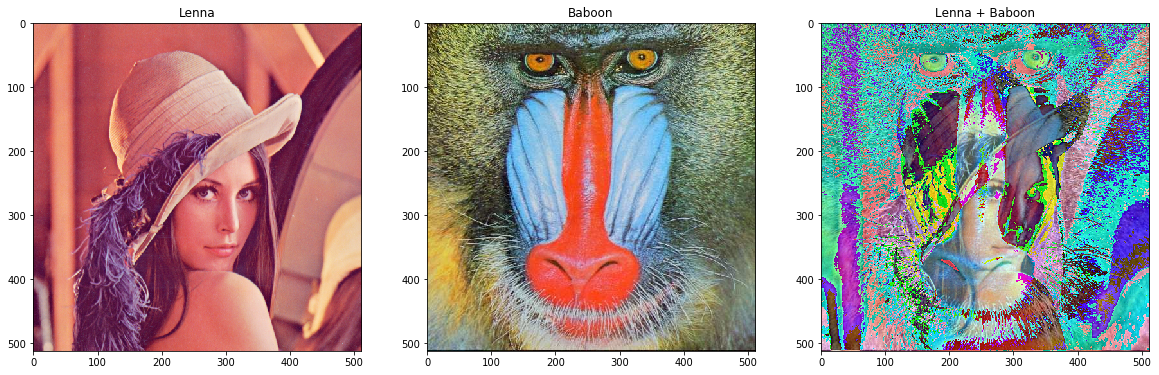

In [5]:
# Adding two images
img = cv.imread(folder_imgs + 'Lenna.png')
img2 = cv.imread(folder_imgs + 'baboon.jpg')
img3 = img + img2
with plt.rc_context(rc={'figure.figsize' : [20, 20]}): # Jupyter confs
    plt.subplot(131), plt.title('Lenna'), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.subplot(132), plt.title('Baboon'), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.subplot(133), plt.title('Lenna + Baboon'), plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
    plt.show()
    

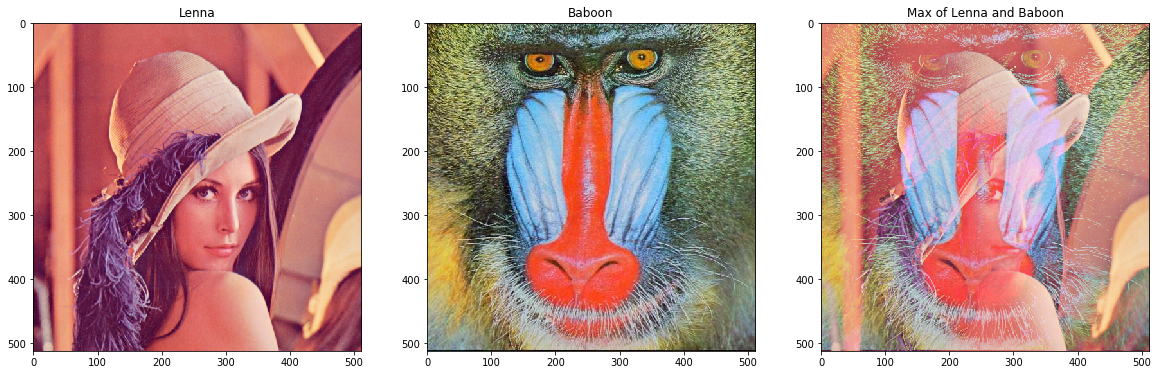

In [6]:
# Max operator
# img = lenna e img2 = baboon
img3 = cv.max(img, img2)
with plt.rc_context(rc={'figure.figsize' : [20, 20]}): # Jupyter confs
    plt.subplot(131), plt.title('Lenna'), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.subplot(132), plt.title('Baboon'), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.subplot(133), plt.title('Max of Lenna and Baboon'), plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
    plt.show()
 

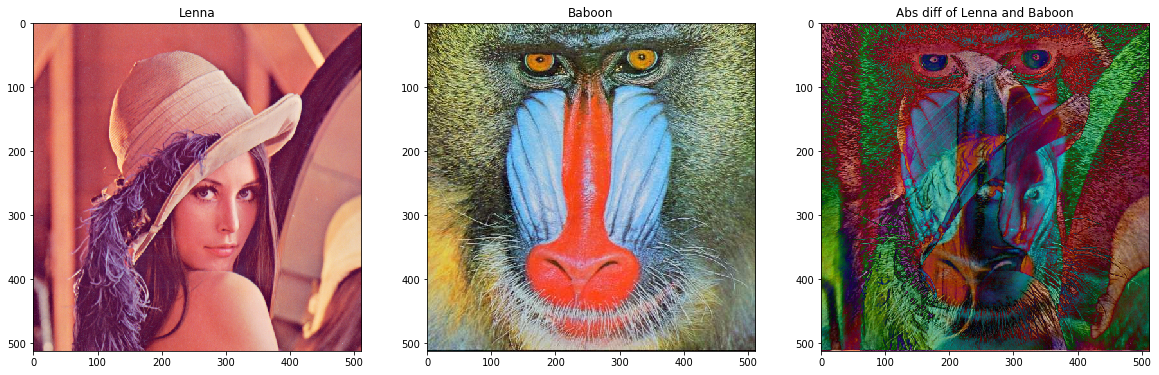

In [7]:
# Absolute image diferencing
img3 = cv.absdiff(img, img2)
with plt.rc_context(rc={'figure.figsize' : [20, 20]}): # Jupyter confs
    plt.subplot(131), plt.title('Lenna'), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.subplot(132), plt.title('Baboon'), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.subplot(133), plt.title('Abs diff of Lenna and Baboon'), plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
    plt.show()
 

In [17]:
# Image difference with webcam
cap = cv.VideoCapture(0)

while cv.waitKey(1) != ord('q'):
    ret, frame1 = cap.read()
    ret, frame2 = cap.read()
    
    gray1 = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
    gray2 = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
    diff = cv.absdiff(gray1, gray2)
    cv.imshow('Gray 1', gray1)
    cv.imshow('Gray 2', gray2)
    cv.imshow('Diff', diff)

cap.release()
cv.destroyAllWindows()

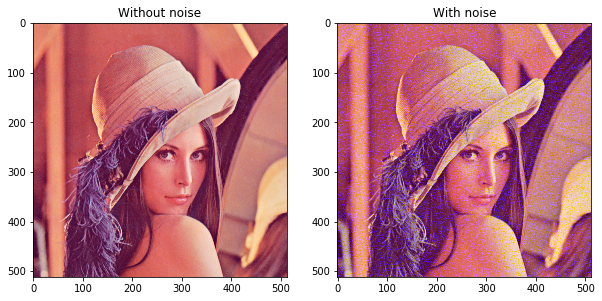

In [8]:
# Adding noise to an image
# img = Lenna
noise = np.zeros(img.shape, img.dtype)
cv.randn(noise, 0, 150)  # Ruído azul, porque na soma abaixo só o primeiro canal é considerado (B de BGR)
img2 = img + noise  # Caso quiséssemos ruído nos três canais, teríamos que ter noise como matriz 3D
with plt.rc_context(rc={'figure.figsize':[10, 10]}):
    plt.subplot(121), plt.title('Without noise'), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.subplot(122), plt.title('With noise'), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.show()

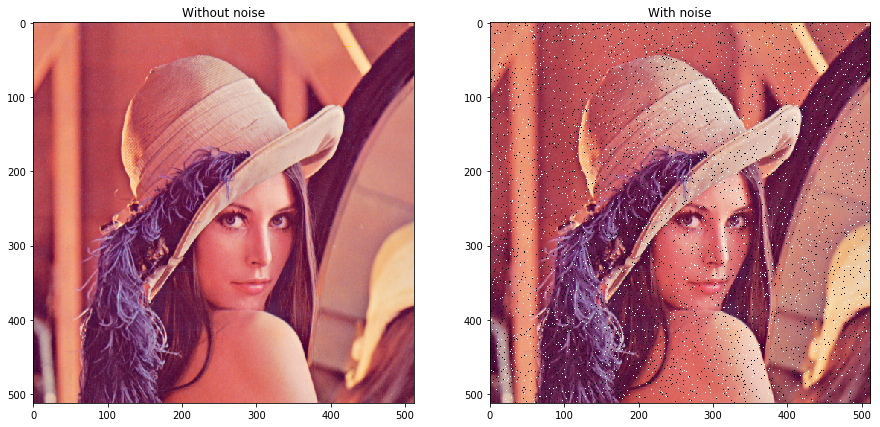

In [12]:
# Adding salter and pepper noise to an image
# img = Lenna
noise = np.zeros((img.shape[0], img.shape[1]), img.dtype)  # Agora o ruído será nos três canais
cv.randu(noise, 0, 255)
salt = noise > 250
pepper = noise < 5
img2 = img.copy()
img2[salt == True] = 255
img2[pepper == True] = 0
with plt.rc_context(rc={'figure.figsize':[15, 15]}):
    plt.subplot(121), plt.title('Without noise'), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.subplot(122), plt.title('With noise'), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.show()

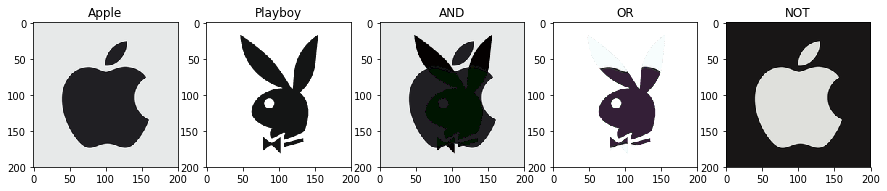

In [21]:
# Set operations
apple = cv.imread(folder_imgs + 'applelogo.png')
playb = cv.imread(folder_imgs + 'playboy.png')
and_img = apple & playb
or_img = apple | playb
not_img = ~apple
with plt.rc_context(rc={'figure.figsize':[15, 15]}):
    plt.subplot(151), plt.title('Apple'), plt.imshow(apple, 'gray')
    plt.subplot(152), plt.title('Playboy'), plt.imshow(playb, 'gray')
    plt.subplot(153), plt.title('AND'), plt.imshow(and_img, 'gray')
    plt.subplot(154), plt.title('OR'), plt.imshow(or_img, 'gray')
    plt.subplot(155), plt.title('NOT'), plt.imshow(not_img, 'gray')